In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
#Q1

#x" = - (2pi)**2 * x, x(0) =1 , x' =0
#total energy vs time 
#using RK2

def G(t, y, omega):
    x, v = y[0], y[1]
    dxdt = v
    dvdt = -omega**2 * x
    return np.array([dxdt, dvdt])


def RK2(G, y0, h, initial, final):
    ts = []
    ys = []

    t = initial
    y = y0

    while t<=final:
       ts.append(t)
       ys.append(y)
       
       k1 = h * G(t, y, 2 * np.pi)
       k2 = h * G(t +(h/2.0), y + (k1/2.0), 2 * np.pi)
       y_next = y + k2
#update 
       t += h
       y = y_next

    return np.array(ts), np.array(ys)
    

In [32]:
# Initial conditions
y0 = np.array([1.0, 0.0])  # x=1, v=0

# Integration parameters
h = 0.001
initial = 0.0
final = 4.0

# Run RK2 solver
t, y = RK2(G, y0, h, initial, final)

x = y[:, 0]
v = y[:, 1]

# Parameters for energy calculation
m = 1.0
omega = 2 * np.pi
k = m * omega**2

# Total energy
E = 0.5 * m * v**2 + 0.5 * k * x**2
KE = 0.5 * m * v**2 
PE = 0.5 * k * x**2

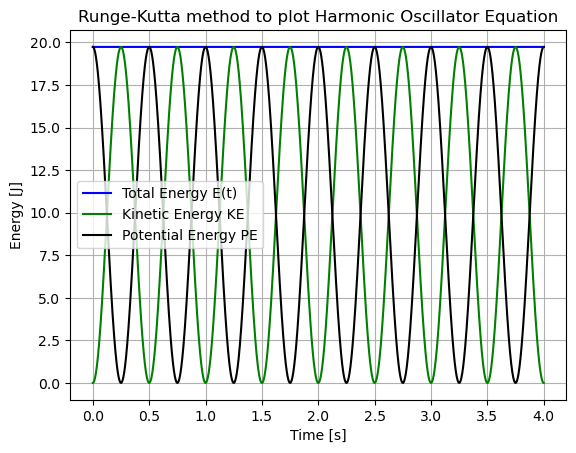

In [34]:

plt.plot(t, E, label='Total Energy E(t)', color='blue')
plt.plot(t, KE, label='Kinetic Energy KE', color='green')
plt.plot(t, PE, label='Potential Energy PE', color='BLACK')
plt.title("Runge-Kutta method to plot Harmonic Oscillator Equation")
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
# Calculate mean energy over all data points
mean_energy = sum(E) / len(E)
print("Mean Energy =", mean_energy)


Mean Energy = 19.739224184413814


In [67]:
#Q2

def bisection(F, x_l, x_r, tolerance):

    if F(x_l) == 0:
        return x_l
    if F(x_r) == 0:
        return x_r

    if F(x_l) * F(x_r) > 0:
        print("Change the range, no root in this")
        return 
        
   # if F(x_l) * F(x_r) < 0:
    x_m = (x_l + x_r)/2
    
    while np.abs(F(x_m)) > tolerance:
        if F(x_l)*F(x_m) <0:
             x_r = x_m
        else:
            x_l = x_m

        x_m = (x_l + x_r) / 2.0
        F_m = F(x_m)
        
    return x_m

In [85]:
def bisection2(a,b, tolerance):

    if (func(a) * func(b) >= 0):
        print("You have not assumed right a and b\n")
        return
        
    c = a
    while ((b-a) >= tolerance):

        # Find middle point
        c = (a+b)/2
 
        # Check if middle point is root
        if (func(c) == 0.0):
            break
 
        # Decide the side to repeat the steps
        if (func(c)*func(a) < 0):
            b = c
        else:
            a = c     
    print("The value of root is : ",c)
    

In [88]:
def func(x):
    function = x**3 - (5*x) + 3
    return function
root1 = bisection2(0, 1, 0.001)
root2 = bisection1(fn , 0, 1, 0.001)
print (root1, root2)

The value of root is :  0.6572265625
None 0.65673828125


In [89]:
def func(x):
    function = x**3 - (5*x) + 3
    return function
root1 = bisection2(1, 2,0.001)
root2 = bisection1(fn , 1, 2, 0.001)
print (root1, root2)

The value of root is :  1.8349609375
None 1.834228515625


In [90]:
def func(x):
    function = x**3 - (5*x) + 3
    return function
root1 = bisection2(-3, 0,0.001)
root2 = bisection1(fn , -3, 0, 0.001)
print (root1, root2)

The value of root is :  -2.490966796875
None -2.490875244140625


In [104]:
#Q3

def newton_raphson(f, f_prime, x0, tol):
    x = x0
    iterations = 0
    while True:
        f_x = f(x)
        f_prime_x = f_prime(x)
        iterations += 1

        x_new = x - f_x / f_prime_x

        if abs(f(x_new)) < tol:
            return x_new, iterations

        x = x_new

In [143]:
def f(x):
    return ((x**3) - x - 4)

def f_prime(x):
    return ((3*x**2) -1)

soln, iterations = newton_raphson(f, f_prime, -1, 10e-3)
print (soln)
print (iterations)

1.7963325907072487
6


In [138]:
#Q4

def g(x):
    return ((2*x**3) - 2*x - 5)

def g_prime(x):
    return ((6*x**2) - 2)

           
#NEWTON - RAPHSON
soln1, iterations = newton_raphson(g, g_prime, 1, 10e-15)
soln2, iterations = newton_raphson(g, g_prime, 1, 10e-3)
print (soln2)
print ("no. of iterations", iterations)
errorN = np.abs(soln2 - soln1)
print ("error = ", errorN)

1.6008778366493719
no. of iterations 4
error =  0.00027929171575102885


In [134]:
#SECANT METHOD 

def secant_method(f, x0, x1, tol):
    x = x0
    x_next = x1
    
    iterations = 0
    
    while True:
        iterations += 1
        x_new = x_next - ( f(x_next) * (x_next - x) / (f(x_next) - f(x)) )

        if abs(f(x_new)) < tol:
            return x_new, iterations

        x = x_next
        x_next = x_new

In [139]:
answer1, iterations = secant_method(g, 1, 2, 10e-15)
answer2, iterations = secant_method(g, 1, 2, 10e-3)
print (answer2)
print (iterations)
print ("no. of iterations", iterations)
errorS = np.abs(answer2 - answer1)
print ("error = ", errorS)

1.6003562447413162
4
no. of iterations 4
error =  0.00024230019230442323


In [142]:
#to find out which one is better, we can compare it with the analytical solution 

if errorN < errorS:
   print ("Newton raphson is better")

else:
  print ("Secant is better")

Secant is better
